In [242]:
import numpy as np
import matplotlib.pyplot as plt

In [243]:
def hadamard_matrix(n):
    if n == 0:
        return np.array([[1]])
    h = hadamard_matrix(n - 1)
    return np.block([[h, h], [h, -h]])

def wht(x):
    n = len(x)
    n = int(np.log2(n)) # n must be a power of 2
    h = hadamard_matrix(n)
    return np.dot(h, x)

In [244]:
print(hadamard_matrix(3))

[[ 1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1]]


In [245]:
# Fast Hadamard Transform (FWHT) implementation

# recursive version to calculate the FWHT
def fwht(a):
    n = len(a)
    if n == 1:
        return a
    n2 = n // 2
    a1 = a[0:n2]
    a2 = a[n2:]
    b1 = fwht(a1)
    b2 = fwht(a2)
    c = np.zeros(n)
    for i in range(n2):
        c[i] = b1[i] + b2[i]
        c[i + n2] = b1[i] - b2[i]
    return c

Random signal: [ 2 -3 -2 -3 -1 -2 -3 -2 -3  0  2  0  1 -2 -2 -3]


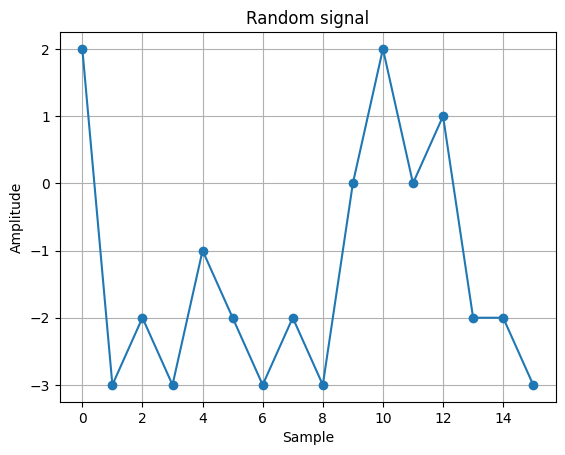

In [246]:
# signal example for the FWHT and WHT

# signal length
n_rand_signal = 16
# signal
rand_signal = np.random.randint(-3, 3, n_rand_signal)
print('Random signal:', rand_signal)

# Plot the signal
plt.plot(rand_signal, 'o-', label='Random signal')
plt.title('Random signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()



Coefficients: [-21.   9.   5.   3.   7.   1.  -7.  -5.  -7.   3.   7.   9.  -3.  11.
  11.   9.]
Reconstructed signal: [ 2. -3. -2. -3. -1. -2. -3. -2. -3.  0.  2.  0.  1. -2. -2. -3.]
Original signal: [ 2 -3 -2 -3 -1 -2 -3 -2 -3  0  2  0  1 -2 -2 -3]


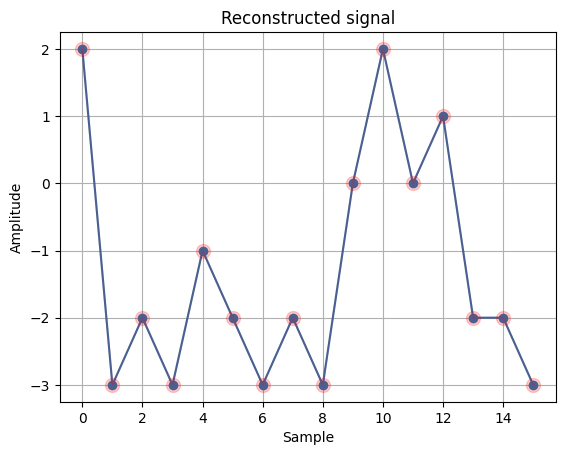

In [247]:
coefficients = fwht(rand_signal)
print('Coefficients:', coefficients)

# reconstruct the signal
reconstructed_signal = fwht(coefficients) / n_rand_signal
print('Reconstructed signal:', reconstructed_signal)
print('Original signal:', rand_signal)

# Plot the reconstructed signal
plt.figure()
plt.plot(reconstructed_signal, 'o-', label='Reconstructed signal')
plot = plt.plot(rand_signal, 'o-', label='Original signal', color='red', alpha=0.2, markersize=10)
plt.title('Reconstructed signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()


## Exemplo com Seno e Cosseno  

Sinusoidal signal: [ 1.          1.11896985  1.08979021  0.93825367  0.70710678  0.44878618
  0.21677275  0.05690575  0.          0.05690575  0.21677275  0.44878618
  0.70710678  0.93825367  1.08979021  1.11896985  1.          0.72878921
  0.32442335 -0.1728868  -0.70710678 -1.21415304 -1.63098631 -1.90466481
 -2.         -1.90466481 -1.63098631 -1.21415304 -0.70710678 -0.1728868
  0.32442335  0.72878921]


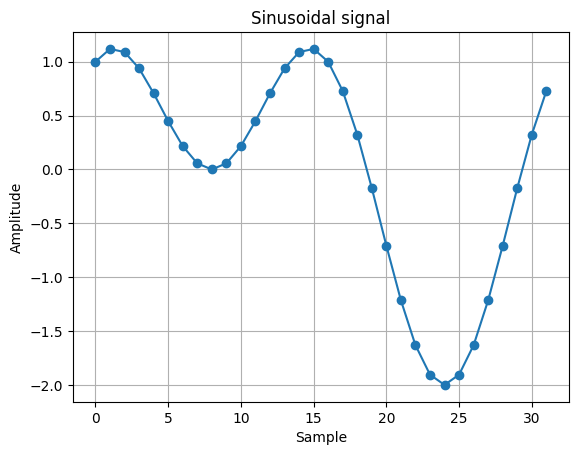

In [248]:
n_sin_cos_signal = 32

# signal
sin_cos = np.sin(2 * np.pi) + np.cos(4 * np.pi)
sin_cos_signal = np.zeros(n_sin_cos_signal)
for i in range(n_sin_cos_signal):
    sin_cos_signal[i] = np.sin(2 * np.pi * i / n_sin_cos_signal) + np.cos(4 * np.pi * i / n_sin_cos_signal)
print('Sinusoidal signal:', sin_cos_signal)

# Plot the signal
plt.figure()
plt.plot(sin_cos_signal, 'o-', label='Sinusoidal signal')
plt.title('Sinusoidal signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()

Coefficients: [-1.77635684e-15  7.77156117e-16  4.44089210e-16 -8.32667268e-16
  4.44089210e-16  2.16493490e-15 -5.55111512e-16  5.55111512e-17
  4.00000000e+00  4.00000000e+00  8.32956880e+00 -3.29568801e-01
  2.01093580e+01 -7.95649470e-01 -1.65685425e+00 -1.65685425e+00
  2.03063408e+01 -1.96982807e-01 -3.97824735e-01 -3.97824735e-01
 -8.28427125e-01 -8.28427125e-01 -1.67308410e+00  1.62298469e-02
 -2.00000000e+00 -2.00000000e+00 -4.03918232e+00  3.91823164e-02
 -8.41116175e+00  8.15929501e-02  1.64784401e-01  1.64784401e-01]
Reconstructed signal: [ 1.          1.11896985  1.08979021  0.93825367  0.70710678  0.44878618
  0.21677275  0.05690575  0.          0.05690575  0.21677275  0.44878618
  0.70710678  0.93825367  1.08979021  1.11896985  1.          0.72878921
  0.32442335 -0.1728868  -0.70710678 -1.21415304 -1.63098631 -1.90466481
 -2.         -1.90466481 -1.63098631 -1.21415304 -0.70710678 -0.1728868
  0.32442335  0.72878921]
Original signal: [ 1.          1.11896985  1.08979021

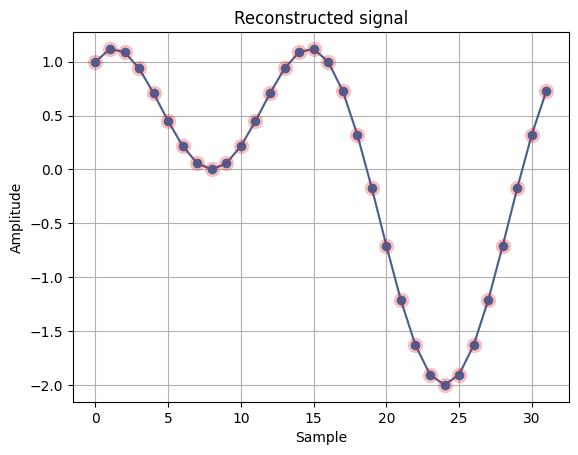

In [249]:
coefficients = fwht(sin_cos_signal)
print('Coefficients:', coefficients)

# reconstruct the signal
reconstructed_signal = fwht(coefficients) / n_sin_cos_signal
print('Reconstructed signal:', reconstructed_signal)
print('Original signal:', sin_cos_signal)

# Plot the reconstructed signal
plt.figure()
plt.plot(reconstructed_signal, 'o-', label='Reconstructed signal')
plt.plot(sin_cos_signal, 'o-', label='Original signal', color='red', alpha=0.2, markersize=10)
plt.title('Reconstructed signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


## Testando com ECG (Eletrocardiograma)

In [250]:
# loading data from a file .mat 

import scipy.io as sio # for loading .mat files

# load the data
data = sio.loadmat('ecg.mat')
print(data)

# get the ECG signal
ecg = data['x'].flatten()
print('ECG signal:', ecg)
print('ECG signal shape:', ecg.shape)


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Feb 19 22:29:21 2021', '__version__': '1.0', '__globals__': [], 'x': array([[-25, -29, -21, ...,  -7,   4,  -4]], dtype=int16)}
ECG signal: [-25 -29 -21 ...  -7   4  -4]
ECG signal shape: (5000,)


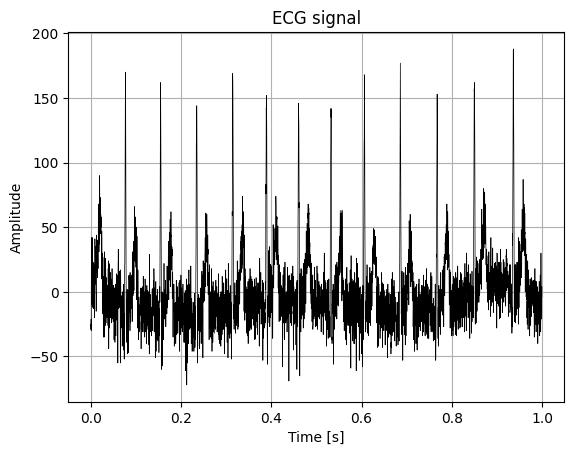

In [251]:
sample_rate = 5000
time = np.arange(ecg.size) / sample_rate
plt.figure()
plt.plot(time, ecg, label='ECG signal', color='black', linewidth=0.5)
plt.title('ECG signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


Coefficients: [-3091.   -89.  1267. ...   193. -1059.   763.]
Reconstructed signal: [-25. -29. -21. ... -24.  -5.  -2.]
Original signal: [-25 -29 -21 ... -24  -5  -2]


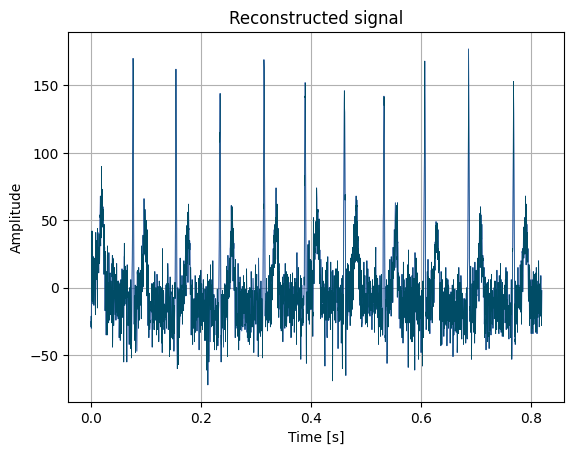

In [252]:
# Fast Walsh-Hadamard Transform (FWHT) of the ECG signal

# x must be a power of 2
n = 2 ** int(np.log2(ecg.size))
ecg = ecg[:n]
new_time = time[:n]

coefficients = fwht(ecg)
print('Coefficients:', coefficients)

# reconstruct the signal
reconstructed_signal = fwht(coefficients) / n
print('Reconstructed signal:', reconstructed_signal)
print('Original signal:', ecg)

# Plot the reconstructed signal
plt.figure()
plt.plot(new_time, reconstructed_signal, label='Reconstructed signal', color='blue', linewidth=0.5)
plt.plot(new_time, ecg, label='Original signal', color='green', linewidth=0.5, alpha=0.6)
plt.title('Reconstructed signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


Difference: [0. 0. 0. ... 0. 0. 0.]


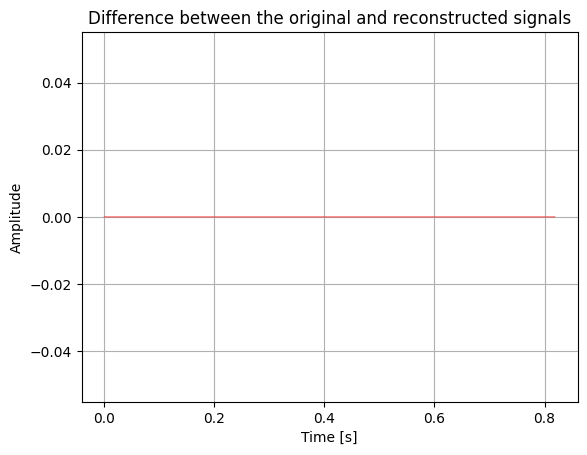

In [253]:
# difference between the original and reconstructed signals

difference = np.abs(ecg - reconstructed_signal)
print('Difference:', difference)

# Plot the difference
plt.figure()
plt.plot(new_time, difference, label='Difference', color='red', linewidth=0.5)
plt.title('Difference between the original and reconstructed signals')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [254]:
# Ordered Walsh-Hadamard Transform (FWHT) of the ECG signal
# Converting Hadamard matrix to ordered Hadamard matrix

def bit_reversal_permutation(n):
    # Bit reversal permutation for n = 2^m elements
    permutation = np.zeros(n, dtype=int)
    for i in range(n):
        permutation[i] = int('{:0{width}b}'.format(i, width=int(np.log2(n)))[::-1], 2)
    return permutation

def gray_code_permutation(n):
    # Gray code permutation for n = 2^m elements
    gray_indices = np.zeros(n, dtype=int)
    for i in range(n):
        gray_indices[i] = i ^ (i >> 1)
    return gray_indices

def hadamard_matrix_ordered(n):
    H = hadamard_matrix(n)
    H_ordered = np.zeros((2**n, 2**n), dtype=int)

    # Apply bit reversal permutation to rows
    permutation = bit_reversal_permutation(2**n)
    for i in range(H.shape[0]):
        H_ordered[i] = H[permutation[i]]

    # Apply gray code permutation to rows
    aux = H_ordered.copy()
    permutation = gray_code_permutation(2**n)
    for i in range(H_ordered.shape[0]):
        H_ordered[i] = aux[permutation[i]]

    return H_ordered


def ordered_wht(x):
    n = len(x)
    n = int(np.log2(n)) # n must be a power of 2
    h = hadamard_matrix_ordered(n)
    return np.dot(h, x)

In [255]:
print(bit_reversal_permutation(8))
print(gray_code_permutation(8))
print(hadamard_matrix_ordered(3))
print(hadamard_matrix(3))

[0 4 2 6 1 5 3 7]
[0 1 3 2 6 7 5 4]
[[ 1  1  1  1  1  1  1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1 -1 -1  1 -1  1  1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1]]
[[ 1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1]]


Coefficients: [-3091   749 -2541 ...   -67  -509   -89]
Reconstructed signal: [-25. -29. -21. ... -24.  -5.  -2.]
Original signal: [-25 -29 -21 ... -24  -5  -2]


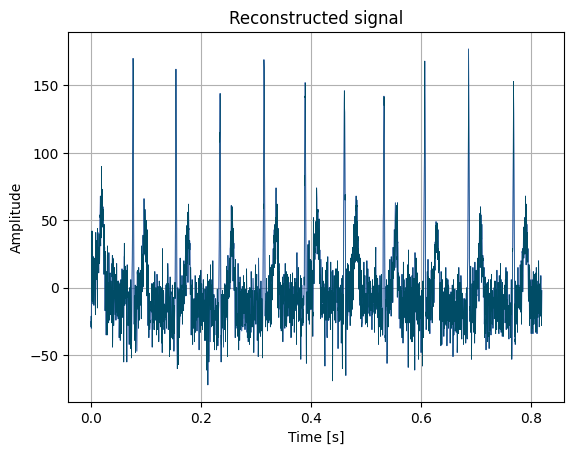

In [256]:
# Ordered Walsh-Hadamard Transform (WHT) of the ECG signal
# x must be a power of 2
n = 2 ** int(np.log2(ecg.size))
ecg = ecg[:n]
new_time = time[:n]

coefficients = ordered_wht(ecg)
print('Coefficients:', coefficients)

# reconstruct the signal
reconstructed_signal = ordered_wht(coefficients) / n
print('Reconstructed signal:', reconstructed_signal)
print('Original signal:', ecg)

# Plot the reconstructed signal
plt.figure()
plt.plot(new_time, reconstructed_signal, label='Reconstructed signal', color='blue', linewidth=0.5)
plt.plot(new_time, ecg, label='Original signal', color='green', linewidth=0.5, alpha=0.6)
plt.title('Reconstructed signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


Difference: [0. 0. 0. ... 0. 0. 0.]


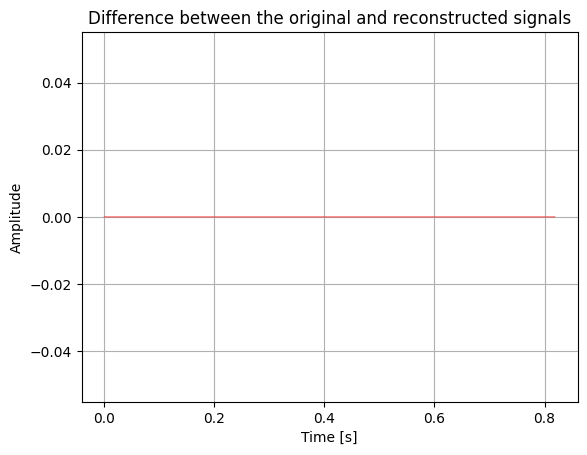

In [257]:
# difference between the original and reconstructed signals

difference = np.abs(ecg - reconstructed_signal)
print('Difference:', difference)

# Plot the difference
plt.figure()
plt.plot(new_time, difference, label='Difference', color='red', linewidth=0.5)
plt.title('Difference between the original and reconstructed signals')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Reconstructed signal: [-27  14   9 ...   5 -17 -12]
Original signal: [-25 -29 -21 ... -24  -5  -2]


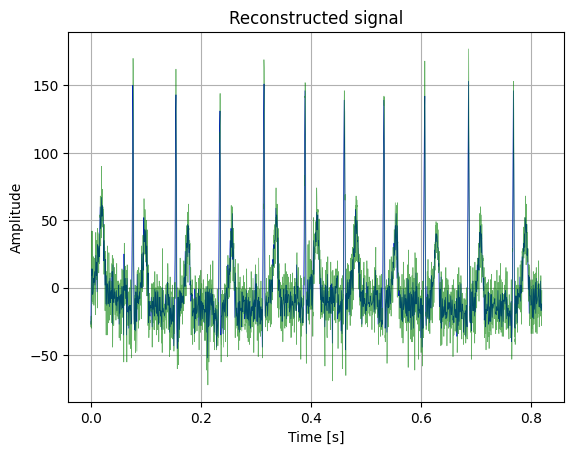

In [270]:
# Removing the high-frequency components of the ECG signal

# Removing the last 75% of the coefficients (high-frequency components) and reconstructing the signal
p = 4 # keep the first 25% of the coefficients = (1/4)

coefficients = ordered_wht(ecg)
coefficients = coefficients[:coefficients.size // p]
new_n = len(coefficients)
order_time = p*np.arange(new_n) / sample_rate


# reconstruct the signal
reconstructed_signal = ordered_wht(coefficients) // n
print('Reconstructed signal:', reconstructed_signal)
print('Original signal:', ecg)

# Plot the reconstructed signal
plt.figure()
plt.plot(order_time, reconstructed_signal, label='Reconstructed signal', color='blue', linewidth=0.5)
plt.plot(new_time, ecg, label='Original signal', color='green', linewidth=0.5, alpha=0.6)
plt.title('Reconstructed signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
